<a href="https://colab.research.google.com/github/0x31nose/Deep_Learning_Tutorial/blob/master/MNIST_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model Selector
- ニューラルネットワークを作成する
- MNISTデータセットを利用する
- フレームワークとしてはPyTorchを利用する
- PyTorchのtorchvisionパッケージを利用する

### データセットの準備と探索

In [3]:
# torch, torchvision, torchvisionのtransformsパッケージをインポートする
# transformsには、画像（を構成する数値データ）を変換するためのクラスが含まれる
# transformsを利用すればMNISTに格納されているデータをPyTorchで使えるように変換作業を行える
import torch
import torchvision
import torchvision.transforms as transforms

# transformsに含まれるToTensorクラス、Normalizeクラスを組み合わせた
# 変換処理を行うオブジェクトを変数transformsに代入している
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# 　BATCH_SIZEとは、訓練データとテストデータから一度に何個のデータを読み込むかの値
# Irisの場合は150個だったが、MNISTは7万個あるため、学習／テストを行う際にはそれらを分割して読み込む。
BATCH_SIZE = 20

# 訓練データが正解ラベル込みで代入される
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      transform=transform, download=True)

# DataLoaderクラスのインスタンス：　trainsetに代入した値を取り出す際に利用する
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

# テストデータが正解ラベル込みで代入される
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     transform=transform, download=True)

# DataLoaderクラスのインスタンス：　testsetに代入した値を取り出す際に利用する
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)



Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### 上記コードのインスタンスに関する概要
##### MNISTクラスのインスタンスの引数について
- **root**: データセットファイルを置くディレクトリを指定
- **train**: 訓練データを生成するか、テストデータを生成するかを指定
- **transform**: trainset/testsetからデータを取り出す際に、MNISTの生データに対して行う処理を指定する。ここでは変数transformを指定している
- **download**: 必要に応じてインターネットからMNISTデータセットをダウンロードするかどうかを指定している

##### DataLoaderクラスのインスタンスの引数について
- **batch_size**: 一度に読み込むデータ数（バッチサイズ）を指定する
- **shuffle**: 読み込むデータをシャッフルするかどうかを指定する

In [11]:
# みてみる
print(f'image: {len(trainset.data[0])} x {len(trainset.data[0][0])}')
for item1 in trainset.data[0]:
    for item2 in item1:
        print(f'{item2.data:4}', end='')
    print()

image: 28 x 28
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0 

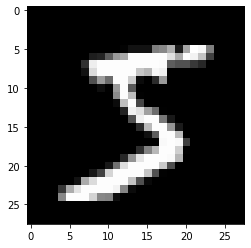

In [19]:
# 先頭の手書き数字を表示する
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(trainset.data[0], cmap='gray')

In [20]:
# 先頭の手書き数字に対応する正解ラベルを表示する
image, label = trainset[0]
print(label)


5


In [21]:
# MNISTクラスのインスタンにたいして　インデックス指定を行って得た画像データを表示する

image = image.reshape(28, 28)
print()
for item1 in image:
  for item2 in item1:
    print(f' {float(item2.data):+1.2f}', end='')
  print()


 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00
 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00
 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00
 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00
 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00
 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -0.98 -0.86 -0.86 -0.86 -0.01 +0.07 +0.37 -0.80 +0.30 +1.00 +0.94 -0.00 -1.00 -1.